<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Assignment1_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving houseprice.csv to houseprice (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import seaborn as sns
import re

ran = False #Used later to prevent code from being ran multiple times

In [ ]:
data = pd.read_csv('houseprice.csv')
newData = data.copy()
newData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,"$300,000",733 sqft,-80.187720,25.771372,NaN,1.0,1.0,2008.0,$409/sqft,2014.0,"$345,000","300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131"
30002,"$119,000","1,716 sqft",-121.031560,37.680702,18.84 acres,3.0,2.0,1998.0,$69/sqft,NaN,NaN,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350"
30003,"$210,000",NaN,-91.137700,30.440481,8276 sqft,NaN,NaN,NaN,NaN,NaN,NaN,"17 Claycut Rd #A Baton Rouge, LA 70806",Baton Rouge,LA,70806.0,"17 Claycut Rd #A, Baton Rouge, LA 70806"
30004,"$329,000",NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,"360 Grove St Brooklyn, NY 11237",Brooklyn,NY,11237.0,"360 Grove St, Brooklyn, NY 11237"


In [ ]:
issues = ["$", ",", "sqft", "acres", "acre", "/"]
for col in newData:
  for issue in issues:
    try:
      newData[col] = newData[col].str.replace(issue, "")
    except AttributeError:
      pass

In [ ]:
priceFormat = re.compile("[0-9]\Z")
for cell in newData["Price"]:
  try:
    if not(priceFormat.findall(cell)):
      newData["Price"] = newData["Price"].replace(cell, np.nan)
  except TypeError:
    pass

In [ ]:
for col in newData:
  try:
    newData[col] = newData[col].astype(float)
  except ValueError:
    pass

In [ ]:
if not(ran):
  lotSizeData = data["Lot Size"]

for i in range(len(newData["Lot Size"])):
  try:
    if "acre" in lotSizeData[i]:
      newValue = round(float(newData["Lot Size"][i]) * 43560, 1)
      newData.iloc[i] = newData.iloc[i].replace(newData["Lot Size"][i], newValue)
  except TypeError:
    pass

ran = True # To prevent errors if this block is ran more than once

In [ ]:
newData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,895900.0,3447.0,-112.081985,33.560055,7895.0,4.0,4.5,2019.0,260.0,NaN,NaN,630 W Echo Ln Phoenix AZ 85021,Phoenix,AZ,85021.0,630 W Echo Ln Phoenix AZ 85021
1,247000.0,1767.0,-96.676250,32.829227,7877.0,3.0,2.0,1954.0,140.0,NaN,NaN,2367 Highwood Dr Dallas TX 75228,Dallas,TX,75228.0,2367 Highwood Dr Dallas TX 75228
2,44900.0,1232.0,-78.825190,42.913000,3510.0,3.0,1.0,1900.0,36.0,NaN,NaN,30 Hurlock Ave Buffalo NY 14211,Buffalo,NY,14211.0,30 Hurlock Ave Buffalo NY 14211
3,959000.0,1417.0,-73.860170,40.722960,2598.0,3.0,2.0,1939.0,677.0,2009.0,532000.0,6416 Alderton St Flushing NY 11374,Flushing,NY,11374.0,6416 Alderton St Flushing NY 11374
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,52000.0,251 NW 177th St #A-123 Miami Gardens FL 33169,Miami Gardens,FL,33169.0,251 NW 177th St #A-123 Miami Gardens FL 33169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,345000.0,300 S Biscayne Blvd #T-3507 Miami FL 33131,Miami,FL,33131.0,300 S Biscayne Blvd #T-3507 Miami FL 33131
30002,119000.0,1716.0,-121.031560,37.680702,820670.4,3.0,2.0,1998.0,69.0,NaN,NaN,2621 Prescott Rd #161 Modesto CA 95350,Modesto,CA,95350.0,2621 Prescott Rd #161 Modesto CA 95350
30003,210000.0,NaN,-91.137700,30.440481,8276.0,NaN,NaN,NaN,NaN,NaN,NaN,17 Claycut Rd #A Baton Rouge LA 70806,Baton Rouge,LA,70806.0,17 Claycut Rd #A Baton Rouge LA 70806
30004,329000.0,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,360 Grove St Brooklyn NY 11237,Brooklyn,NY,11237.0,360 Grove St Brooklyn NY 11237


In [ ]:
newData = newData.drop(["Address Full", "Address"], axis = 1)
newData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,City,State,Zipcode
0,895900.0,3447.0,-112.081985,33.560055,7895.0,4.0,4.5,2019.0,260.0,NaN,NaN,Phoenix,AZ,85021.0
1,247000.0,1767.0,-96.676250,32.829227,7877.0,3.0,2.0,1954.0,140.0,NaN,NaN,Dallas,TX,75228.0
2,44900.0,1232.0,-78.825190,42.913000,3510.0,3.0,1.0,1900.0,36.0,NaN,NaN,Buffalo,NY,14211.0
3,959000.0,1417.0,-73.860170,40.722960,2598.0,3.0,2.0,1939.0,677.0,2009.0,532000.0,Flushing,NY,11374.0
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,52000.0,Miami Gardens,FL,33169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,345000.0,Miami,FL,33131.0
30002,119000.0,1716.0,-121.031560,37.680702,820670.4,3.0,2.0,1998.0,69.0,NaN,NaN,Modesto,CA,95350.0
30003,210000.0,NaN,-91.137700,30.440481,8276.0,NaN,NaN,NaN,NaN,NaN,NaN,Baton Rouge,LA,70806.0
30004,329000.0,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,NaN,Brooklyn,NY,11237.0


In [ ]:
 newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           28695 non-null  float64
 1   Sqr Ft          27786 non-null  float64
 2   Longitude       30006 non-null  float64
 3   Latitude        30006 non-null  float64
 4   Lot Size        25490 non-null  float64
 5   Beds            27420 non-null  float64
 6   Bath            27496 non-null  float64
 7   Year Built      26258 non-null  float64
 8   Price Sqr Ft    27271 non-null  float64
 9   Last Sold Year  14213 non-null  float64
 10  Last Sold For   14213 non-null  float64
 11  City            30006 non-null  object 
 12  State           30006 non-null  object 
 13  Zipcode         30003 non-null  float64
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


In [ ]:
newData.isna().sum()

,0
Price,1311
Sqr Ft,2220
Longitude,0
Latitude,0
Lot Size,4516
Beds,2586
Bath,2510
Year Built,3748
Price Sqr Ft,2735
Last Sold Year,15793


In [ ]:
tempNewData = newData.join(pd.get_dummies(newData["City"]))
tempNewData = newData.join(pd.get_dummies(newData["State"]))
newData = newData.drop(["City", "State"], axis = 1)
tempNewData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,...,NY,OH,OK,OR,PA,TN,TX,VA,WA,WI
0,895900.0,3447.0,-112.081985,33.560055,7895.0,4.0,4.5,2019.0,260.0,NaN,...,False,False,False,False,False,False,False,False,False,False
1,247000.0,1767.0,-96.676250,32.829227,7877.0,3.0,2.0,1954.0,140.0,NaN,...,False,False,False,False,False,False,True,False,False,False
2,44900.0,1232.0,-78.825190,42.913000,3510.0,3.0,1.0,1900.0,36.0,NaN,...,True,False,False,False,False,False,False,False,False,False
3,959000.0,1417.0,-73.860170,40.722960,2598.0,3.0,2.0,1939.0,677.0,2009.0,...,True,False,False,False,False,False,False,False,False,False
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,...,False,False,False,False,False,False,False,False,False,False
30002,119000.0,1716.0,-121.031560,37.680702,820670.4,3.0,2.0,1998.0,69.0,NaN,...,False,False,False,False,False,False,False,False,False,False
30003,210000.0,NaN,-91.137700,30.440481,8276.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
30004,329000.0,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sqr Ft'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Lot Size'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Price Sqr Ft'}>],
       [<Axes: title={'center': 'Last Sold Year'}>,
        <Axes: title={'center': 'Last Sold For'}>,
        <Axes: title={'center': 'Zipcode'}>]], dtype=object)

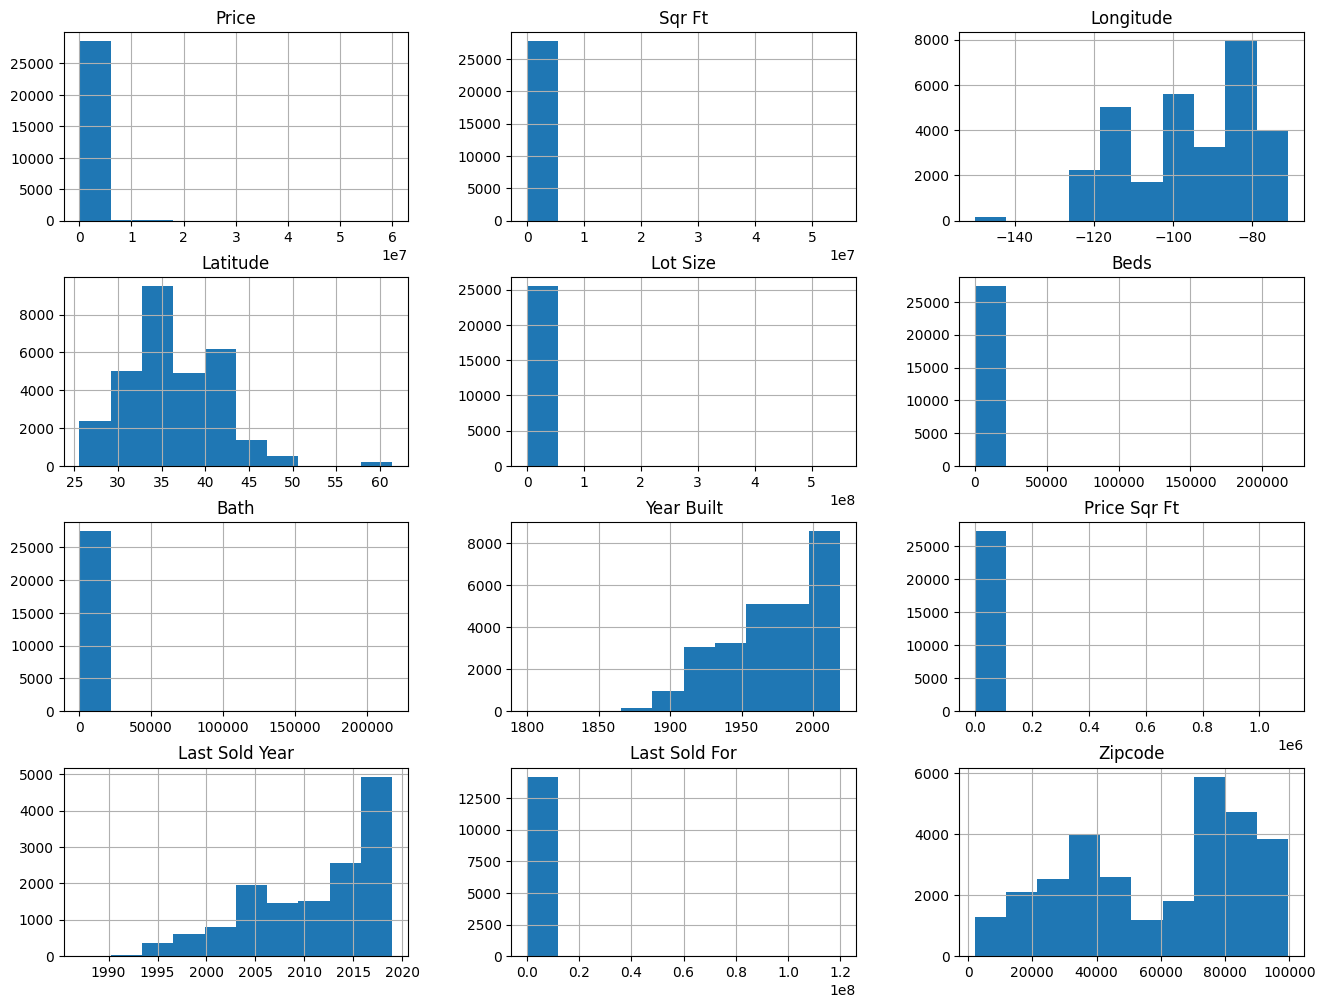

In [ ]:
newData.hist(figsize = (16, 12))

<Axes: >

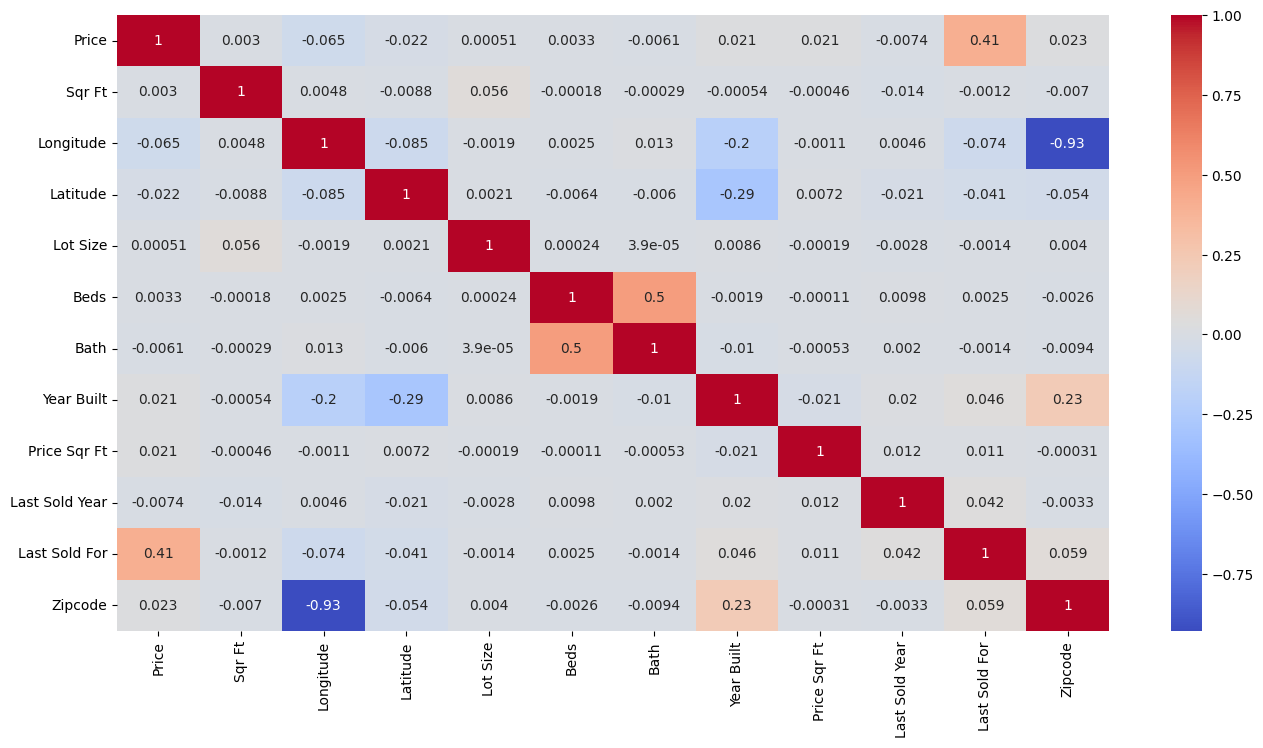

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(newData.corr(numeric_only = True), annot = True, cmap="coolwarm")

<Axes: xlabel='Longitude', ylabel='Latitude'>

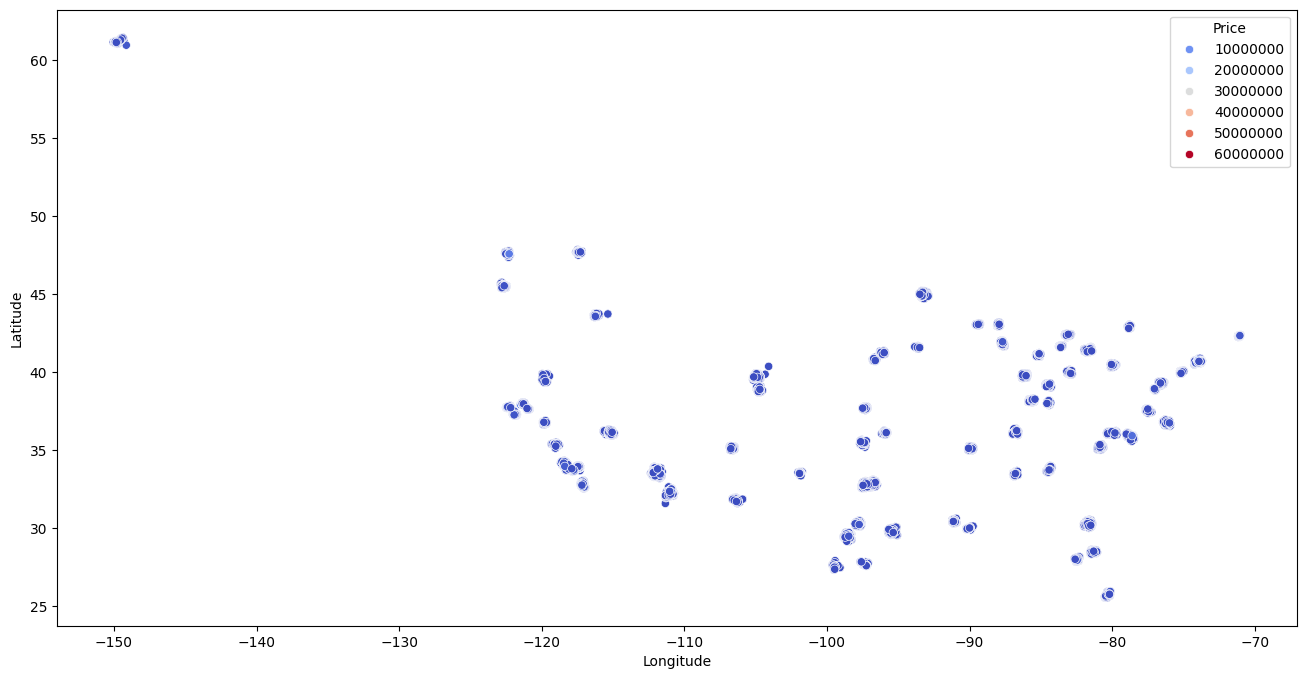

In [ ]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x = "Longitude", y = "Latitude", data = newData, hue = "Price", palette = "coolwarm" )

In [ ]:
#Can only be ran once
def Outlier(df, col):
    newdf = df[col]
    newdf = newdf.astype(float)
    Q1 = newdf.quantile(0.25)
    Q3 = newdf.quantile(0.75)
    IQR = (Q3 - Q1)

    count = 0
    for i in range(len(df)):
      if Q3 > newdf[i] >= (Q1 - 1.5 * IQR):
        pass
      elif newdf[i] <= (Q3 + 1.5 * IQR):
        pass
      else:
        df[col] = df[col].replace(df[col][i], np.nan)
      count += 1

Outlier(newData, "Price")
Outlier(newData, "Sqr Ft")
Outlier(newData, "Lot Size")
Outlier(newData, "Beds")
Outlier(newData, "Bath")
Outlier(newData, "Price Sqr Ft")
Outlier(newData, "Year Built")
Outlier(newData, "Last Sold For")

In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           26117 non-null  float64
 1   Sqr Ft          26329 non-null  float64
 2   Longitude       30006 non-null  float64
 3   Latitude        30006 non-null  float64
 4   Lot Size        21964 non-null  float64
 5   Beds            26420 non-null  float64
 6   Bath            25887 non-null  float64
 7   Year Built      26258 non-null  float64
 8   Price Sqr Ft    24610 non-null  float64
 9   Last Sold Year  14213 non-null  float64
 10  Last Sold For   13174 non-null  float64
 11  Zipcode         30003 non-null  float64
dtypes: float64(12)
memory usage: 2.7 MB


In [ ]:
newData.isna().sum()

,0
Price,3889
Sqr Ft,3677
Longitude,0
Latitude,0
Lot Size,8042
Beds,3586
Bath,4119
Year Built,3748
Price Sqr Ft,5396
Last Sold Year,15793


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sqr Ft'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Lot Size'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Price Sqr Ft'}>],
       [<Axes: title={'center': 'Last Sold Year'}>,
        <Axes: title={'center': 'Last Sold For'}>,
        <Axes: title={'center': 'Zipcode'}>]], dtype=object)

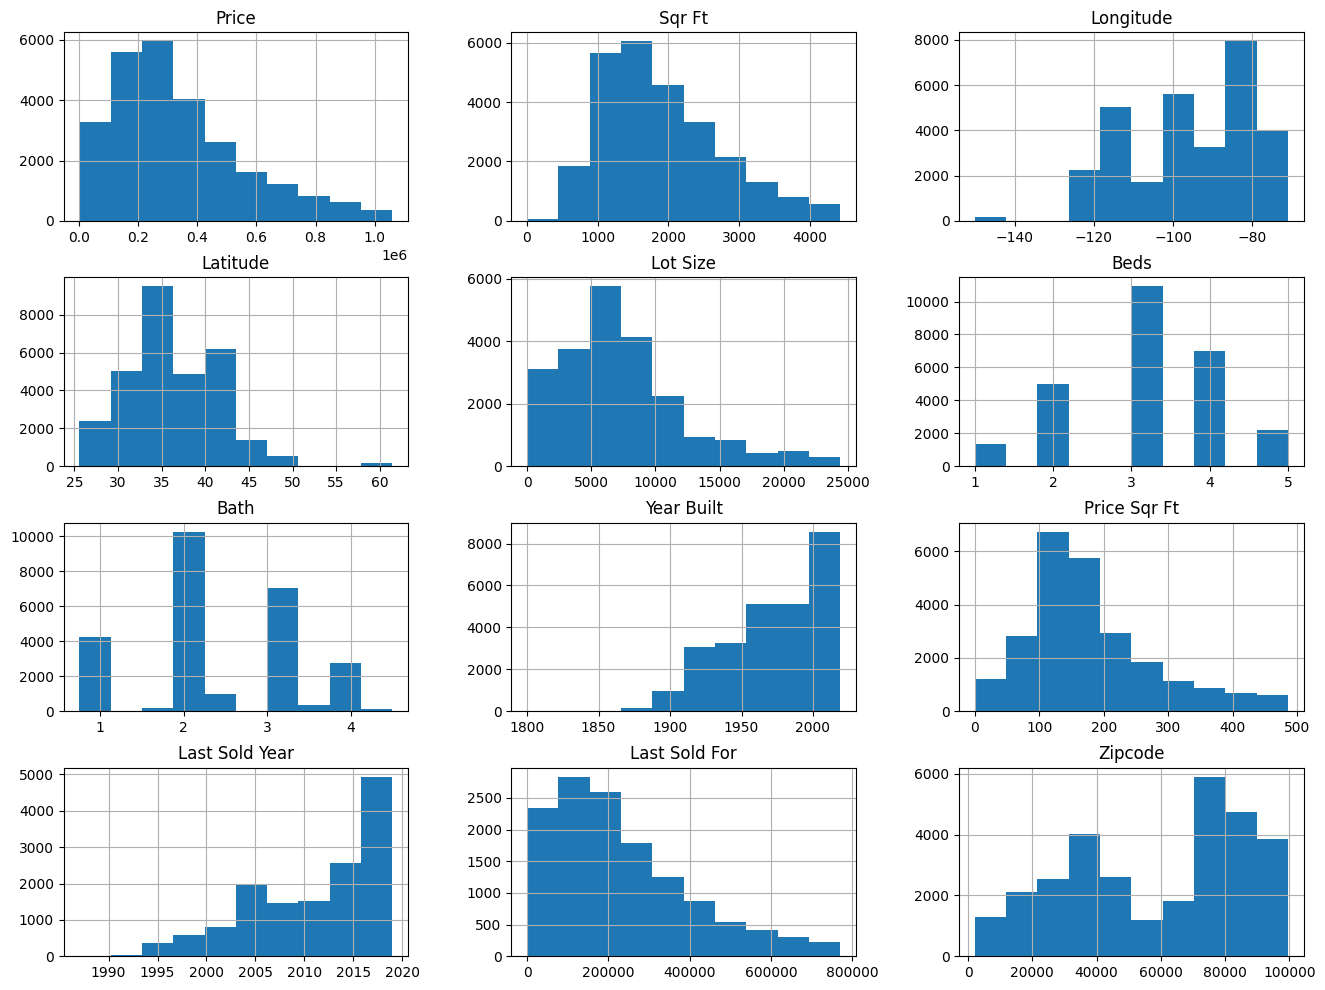

In [ ]:
newData.hist(figsize = (16, 12))

<Axes: >

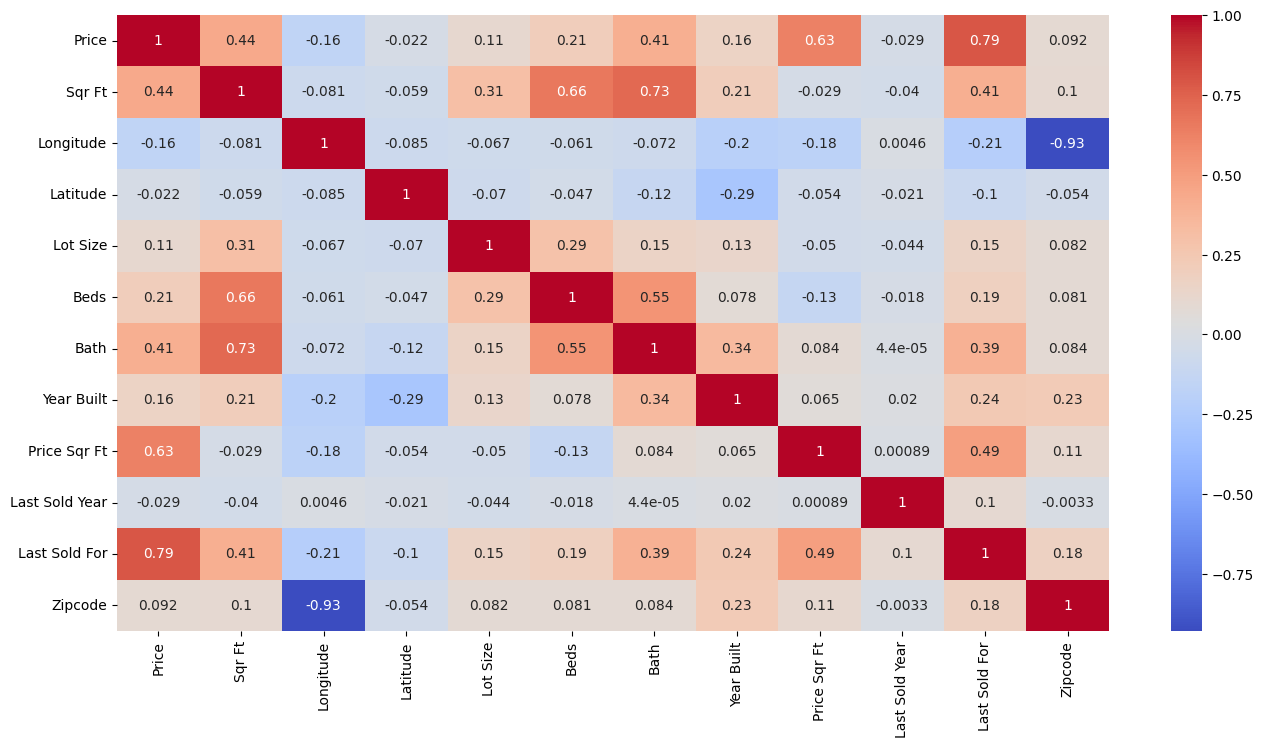

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(newData.corr(numeric_only=True), annot = True, cmap="coolwarm")

<Axes: xlabel='Longitude', ylabel='Latitude'>

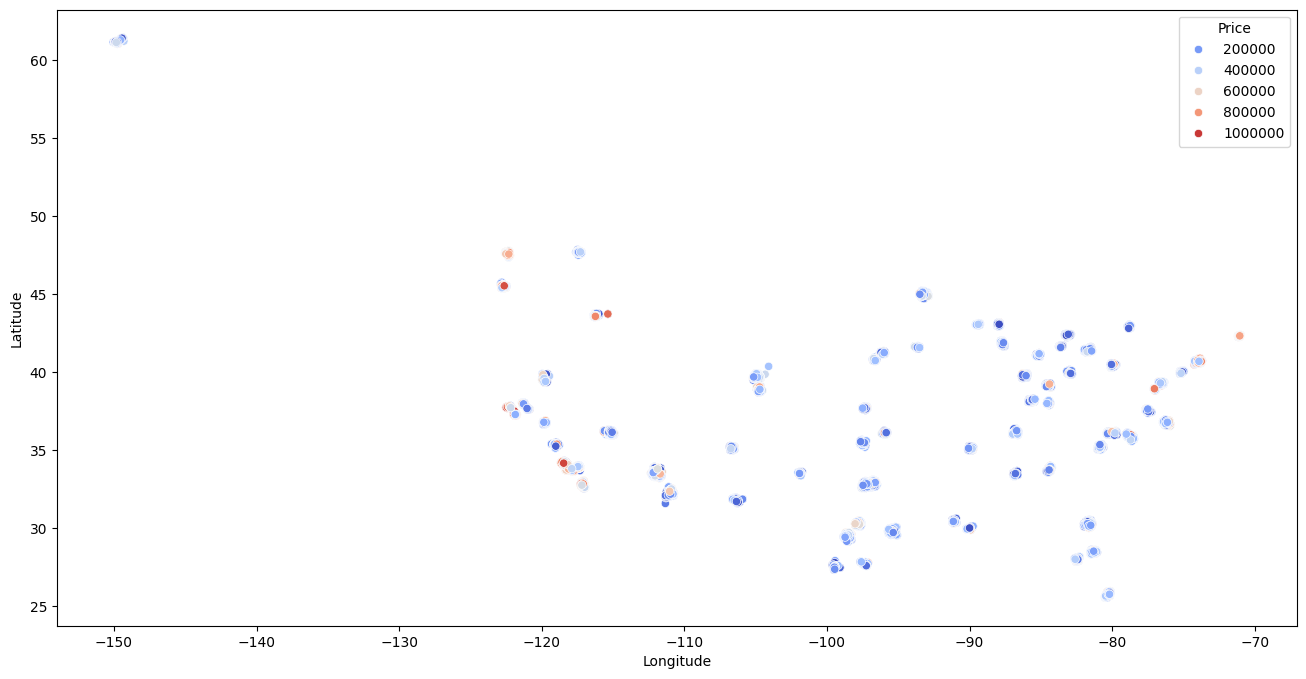

In [ ]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x = "Longitude", y = "Latitude", data = newData, hue = "Price", palette = "coolwarm" )

In [ ]:
def FeatureEngineering(df, cols, function, newFeatureName):
  dfCols = []
  currentYear = 2024

  for i in range(len(cols)):
    dfCols.append(df[cols[i]])

  df[newFeatureName] = dfCols[0]

  if function == "+":
    for i in range(len(dfCols) - 1):
      df[newFeatureName] += dfCols[i + 1]
  elif function == "-":
    if "Year" in dfCols[0]:
      df[newFeatureName] = 2024 - df[dfCols[0]]
    else:
      for i in range(len(dfCols) - 1):
        df[newFeatureName] -= dfCols[i + 1]
  elif function == "/":
    for i in range(len(dfCols) - 1):
      df[newFeatureName] /= dfCols[i + 1]
  elif function == "*":
    for i in range(len(dfCols) - 1):
      df[newFeatureName] *= dfCols[i + 1]
  elif function == "":
      df[newFeatureName] = (dfCols[0]/dfCols[1])**(1/dfCols[2])

  df[newFeatureName] = df[newFeatureName].round(1)

FeatureEngineering(newData, ["Bath", "Beds"], "/", "Bath:Beds")
FeatureEngineering(newData, ["Beds", "Beds"], "/", "Beds:Bath")
FeatureEngineering(newData, ["Beds", "Bath"], "+", "Total Rooms")
FeatureEngineering(newData, ["Price", "Beds"], "/", "Price/Beds")
FeatureEngineering(newData, ["Price", "Bath"], "/", "Price/Bath")
FeatureEngineering(newData, ["Sqr Ft", "Beds"], "/", "Sqr Ft/Beds")
FeatureEngineering(newData, ["Sqr Ft", "Bath"], "/", "Sqr Ft/Bath")
FeatureEngineering(newData, ["Lot Size", "Sqr Ft"], "/", "Lot Size/Sqr Ft")
FeatureEngineering(newData, ["Sqr Ft", "Lot Size"], "/", "Sqr Ft/Lot Size")
FeatureEngineering(newData, ["Price Sqr Ft", "Beds", "Bath"], "*", "Adjusted Price Sqr Ft")
FeatureEngineering(newData, ["Year Built"], "-", "Age of Property")
FeatureEngineering(newData, ["Last Sold Year"], "-", "Years since last sold")
FeatureEngineering(newData, ["Price", "Last Sold For", "Last Sold Year"], "", "Annual Appreciation Rate")

In [ ]:
newData

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,...,Price/Beds,Price/Bath,Sqr Ft/Beds,Sqr Ft/Bath,Lot Size/Sqr Ft,Sqr Ft/Lot Size,Adjusted Price Sqr Ft,Age of Property,Years since last sold,Annual Appreciation Rate
0,895900.0,3447.0,-112.081985,33.560055,7895.0,4.0,4.5,2019.0,260.0,NaN,...,223975.0,199088.9,861.8,766.0,2.3,0.4,4680.0,2019.0,NaN,NaN
1,247000.0,1767.0,-96.676250,32.829227,7877.0,3.0,2.0,1954.0,140.0,NaN,...,82333.3,123500.0,589.0,883.5,4.5,0.2,840.0,1954.0,NaN,NaN
2,44900.0,1232.0,-78.825190,42.913000,3510.0,3.0,1.0,1900.0,36.0,NaN,...,14966.7,44900.0,410.7,1232.0,2.8,0.4,108.0,1900.0,NaN,NaN
3,959000.0,1417.0,-73.860170,40.722960,2598.0,3.0,2.0,1939.0,NaN,2009.0,...,319666.7,479500.0,472.3,708.5,1.8,0.5,NaN,1939.0,2009.0,1.0
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,...,NaN,83500.0,NaN,440.0,NaN,NaN,NaN,1971.0,2007.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,300000.0,733.0,-80.187720,25.771372,NaN,1.0,1.0,2008.0,409.0,2014.0,...,300000.0,300000.0,733.0,733.0,NaN,NaN,409.0,2008.0,2014.0,1.0
30002,119000.0,1716.0,-121.031560,37.680702,NaN,3.0,2.0,1998.0,69.0,NaN,...,39666.7,59500.0,572.0,858.0,NaN,NaN,414.0,1998.0,NaN,NaN
30003,210000.0,NaN,-91.137700,30.440481,8276.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30004,329000.0,NaN,-73.913930,40.699930,NaN,NaN,3.0,2007.0,NaN,NaN,...,NaN,109666.7,NaN,NaN,NaN,NaN,NaN,2007.0,NaN,NaN


In [ ]:
newData["Price"]

,Price
0,895900.0
1,247000.0
2,44900.0
3,959000.0
4,83500.0
...,...
30001,300000.0
30002,119000.0
30003,210000.0
30004,329000.0


<Axes: >

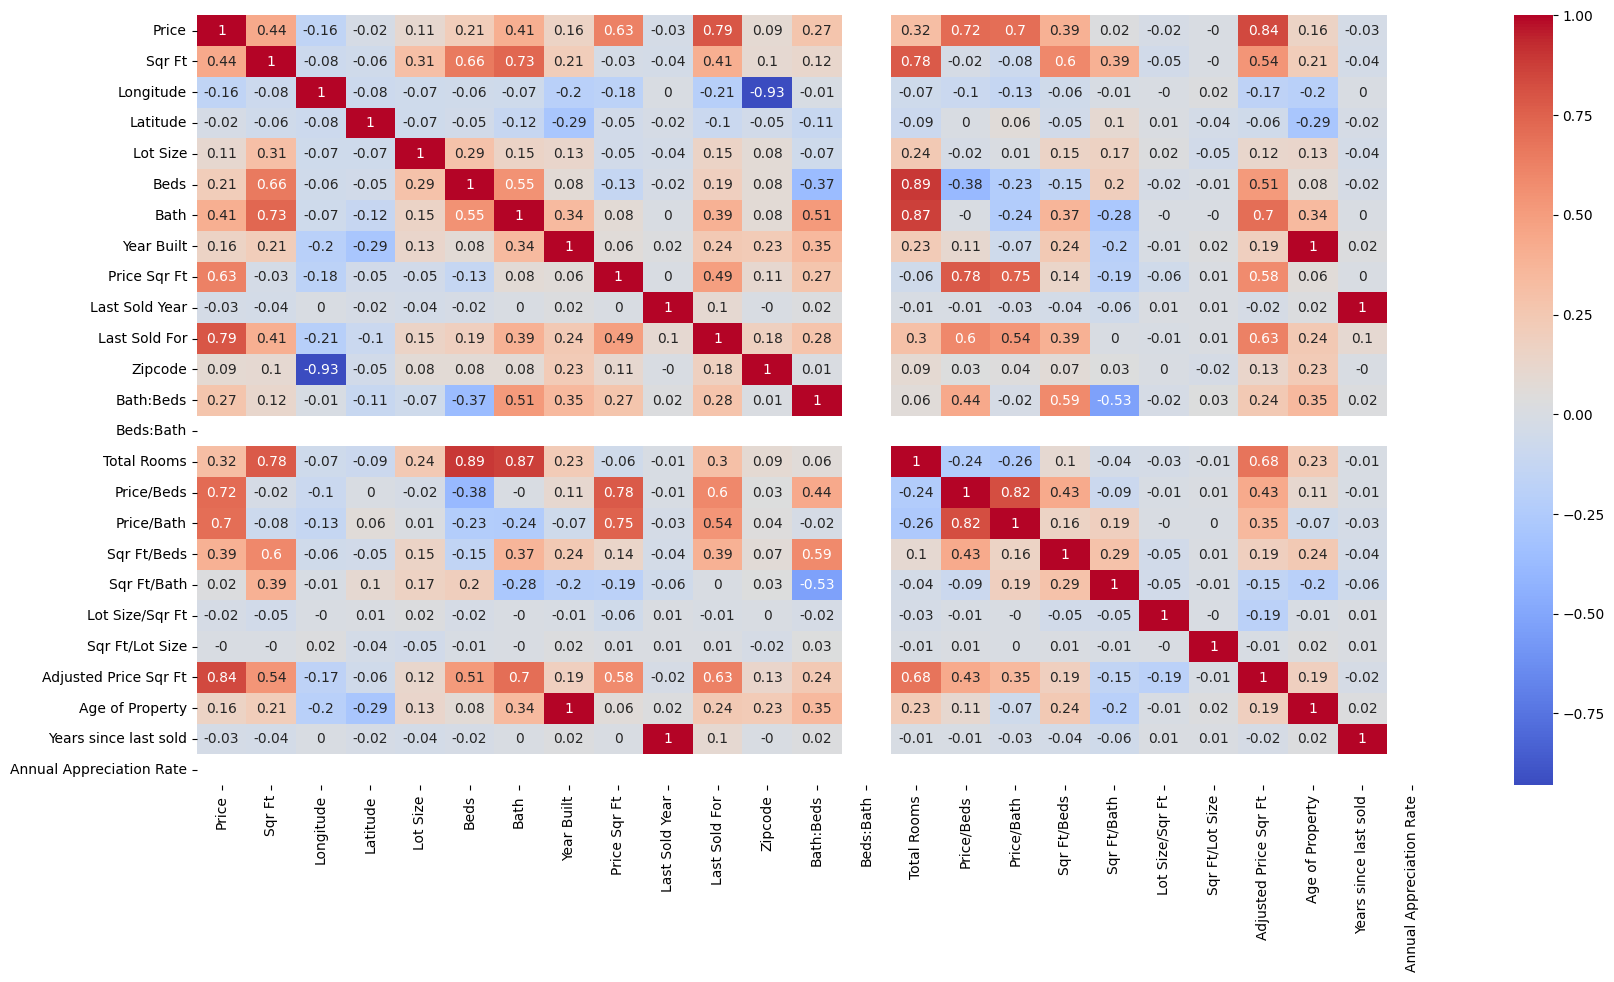

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(newData.corr(numeric_only=True).round(2), annot = True, cmap="coolwarm")

In [ ]:
priceCorrelation = newData.corr(numeric_only=True)["Price"].round(2).sort_values(ascending = False)

for i in range(len(priceCorrelation)):
  try:
    if priceCorrelation.iloc[i] <= 0:
      priceCorrelation = priceCorrelation.drop(i)
  except KeyError:
    pass
priceCorrelation

,Price
Price,1.00
Adjusted Price Sqr Ft,0.84
Last Sold For,0.79
Price/Beds,0.72
Price/Bath,0.70
Price Sqr Ft,0.63
Sqr Ft,0.44
Bath,0.41
Sqr Ft/Beds,0.39
Total Rooms,0.32


In [ ]:
from sklearn.model_selection import train_test_split

x = newData[["Adjusted Price Sqr Ft", "Last Sold For", "Price/Beds", "Price/Bath", "Price Sqr Ft", "Sqr Ft", "Bath", "Sqr Ft/Beds", "Total Rooms", "Bath:Beds", "Beds"]]
y = newData["Price"]

In [ ]:
np.random.seed(42)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)
trainData = xTrain.join(yTrain)
testData = xTest.join(yTest)

In [ ]:
trainData

,Adjusted Price Sqr Ft,Last Sold For,Price/Beds,Price/Bath,Price Sqr Ft,Sqr Ft,Bath,Sqr Ft/Beds,Total Rooms,Bath:Beds,Beds,Price
251,1704.0,NaN,71997.5,95996.7,142.0,2025.0,3.0,506.2,7.0,0.8,4.0,287990.0
25472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140000.0
618,2145.0,247000.0,70000.0,116666.7,143.0,2454.0,3.0,490.8,8.0,0.6,5.0,350000.0
17092,1056.0,162000.0,94999.7,142499.5,176.0,1620.0,2.0,540.0,5.0,0.7,3.0,284999.0
20762,1200.0,452000.0,174950.0,174950.0,300.0,1168.0,2.0,584.0,4.0,1.0,2.0,349900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29802,2752.0,NaN,146250.0,146250.0,172.0,3394.0,4.0,848.5,8.0,1.0,4.0,585000.0
5390,1044.0,53600.0,78333.3,117500.0,174.0,1354.0,2.0,451.3,5.0,0.7,3.0,235000.0
860,398.0,NaN,142450.0,284900.0,199.0,1435.0,1.0,717.5,3.0,0.5,2.0,284900.0
15795,351.0,NaN,214380.0,214380.0,351.0,610.0,1.0,610.0,2.0,1.0,1.0,214380.0


In [ ]:
trainMask = ~(np.isnan(xTrain).any(axis=1) | np.isnan(yTrain))
testMask2 = ~(np.isnan(xTest).any(axis=1) | np.isnan(yTest))

xTrain, yTrain = xTrain[trainMask], yTrain[trainMask]
xTest, yTest = xTest[testMask2], yTest[testMask2]

trainData = xTrain.join(yTrain)
testData = xTest.join(yTest)

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
xTrainS = standardScaler.fit_transform(xTrain)
xTestS = standardScaler.fit_transform(xTest)

array([[<Axes: title={'center': 'Adjusted Price Sqr Ft'}>,
        <Axes: title={'center': 'Last Sold For'}>,
        <Axes: title={'center': 'Price/Beds'}>],
       [<Axes: title={'center': 'Price/Bath'}>,
        <Axes: title={'center': 'Price Sqr Ft'}>,
        <Axes: title={'center': 'Sqr Ft'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Sqr Ft/Beds'}>,
        <Axes: title={'center': 'Total Rooms'}>],
       [<Axes: title={'center': 'Bath:Beds'}>,
        <Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

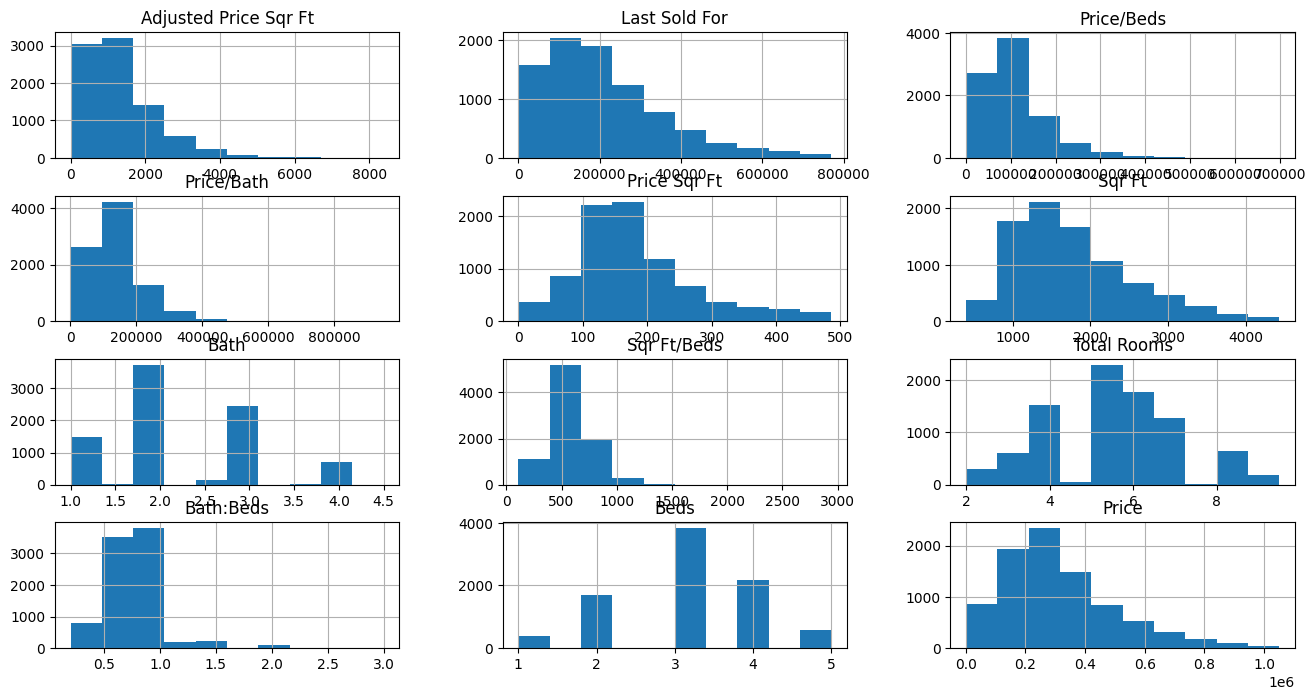

In [ ]:
trainData.hist(figsize = (16, 8))

<Axes: >

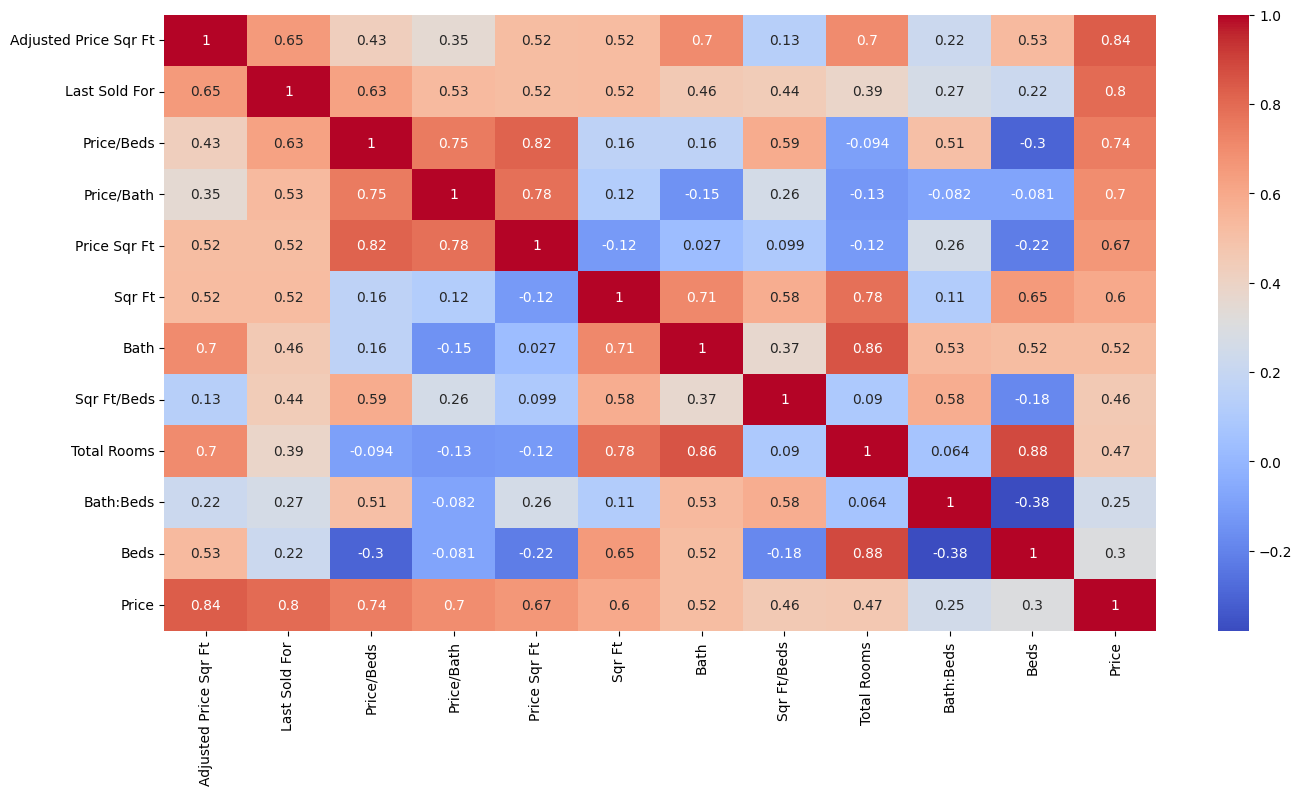

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(trainData.corr(numeric_only=True), annot = True, cmap="coolwarm")

In [ ]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(xTrain, yTrain)

linRegScore = round(linReg.score(xTest, yTest), 2)

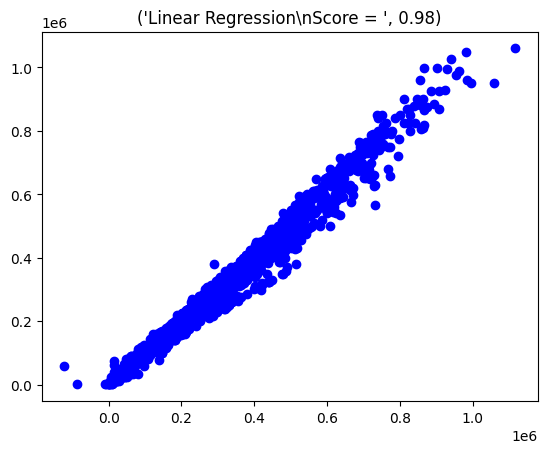

In [ ]:
linRegpredictedPrice = pd.DataFrame(linReg.predict(xTest).round(1))
actualPrice = yTest
plt.title(("Linear Regression\nScore = ",  linRegScore))
for i in range(len(linRegpredictedPrice)):
  plt.scatter(linRegpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xTrainPoly = polyFeatures.fit_transform(xTrain)

polyLinReg = LinearRegression()
polyLinReg.fit(xTrainPoly, yTrain)

xTestPoly = polyFeatures.fit_transform(xTest)

polyLinRegScore = round(polyLinReg.score(xTestPoly, yTest), 2)

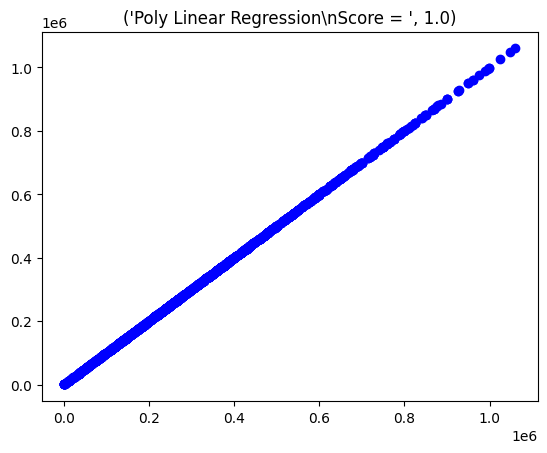

In [ ]:
polyLinRegpredictedPrice = pd.DataFrame(polyLinReg.predict(polyFeatures.fit_transform(xTest)).round(1))
actualPrice = yTest
plt.title(("Poly Linear Regression\nScore = ",  polyLinRegScore))
for i in range(len(polyLinRegpredictedPrice)):
  plt.scatter(polyLinRegpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forestReg = RandomForestRegressor()
forestReg.fit(xTrain, yTrain)
forestRegScore = round(forestReg.score(xTest, yTest), 2)

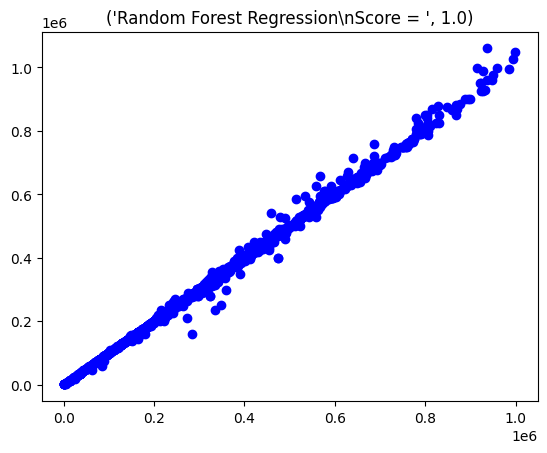

In [ ]:
forestRegpredictedPrice = pd.DataFrame(forestReg.predict(xTest).round(1))
actualPrice = yTest
plt.title(("Random Forest Regression\nScore = ",  forestRegScore))
for i in range(len(forestRegpredictedPrice)):
  plt.scatter(forestRegpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
from sklearn.svm import SVR

linearSVR = SVR(kernel="linear")
linearSVR.fit(xTrainS, yTrain)

linearSVRScore = round(linearSVR.score(xTestS, yTest), 2)

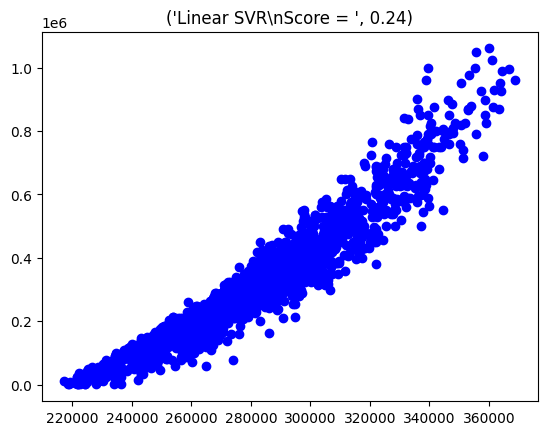

In [ ]:
linearSVRpredictedPrice = pd.DataFrame(linearSVR.predict(xTestS).round(1))
actualPrice = yTest
plt.title(("Linear SVR\nScore = ",  linearSVRScore))
for i in range(len(linearSVRpredictedPrice)):
  plt.scatter(linearSVRpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.001, 0.01, 0.1, 0.5],
}

grid_search = GridSearchCV(linearSVR, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(xTrainS, yTrain)
bestLinearSVR = grid_search.best_estimator_
bestLinearSVR

SVR(C=100, epsilon=0.5, kernel='linear')

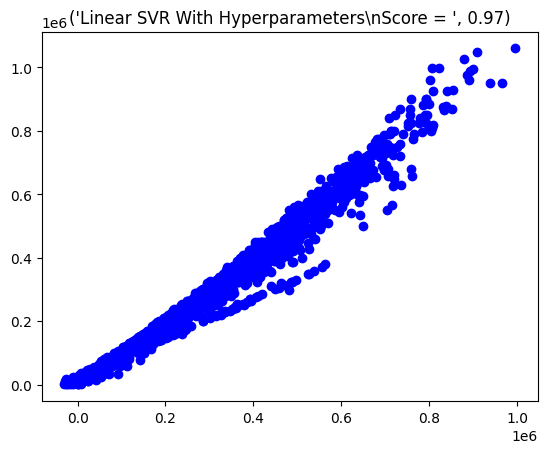

In [ ]:
bestLinearSVRScore = round(bestLinearSVR.score(xTestS, yTest), 2)
bestLinearSVRpredictedPrice = pd.DataFrame(bestLinearSVR.predict(xTestS).round(1))
actualPrice = yTest
plt.title(("Linear SVR With Hyperparameters\nScore = ",  bestLinearSVRScore))
for i in range(len(bestLinearSVRpredictedPrice)):
  plt.scatter(bestLinearSVRpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
nonLinearSVR = SVR(kernel="poly")
nonLinearSVR.fit(xTrainS, yTrain)

nonLinearSVRScore = round(nonLinearSVR.score(xTestS, yTest), 2)

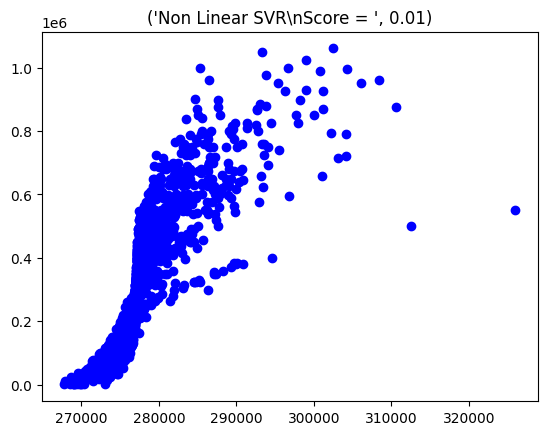

In [ ]:
nonLinearSVRpredictedPrice = pd.DataFrame(nonLinearSVR.predict(xTestS).round(1))
actualPrice = yTest
plt.title(("Non Linear SVR\nScore = ",  nonLinearSVRScore))
for i in range(len(nonLinearSVRpredictedPrice)):
  plt.scatter(nonLinearSVRpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
param_grid = {
    "C": [10, 100, 500, 1000],
    "epsilon": [0, 0.001, 0.01],
    "degree": [2, 3, 4]
}

grid_search = GridSearchCV(nonLinearSVR, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(xTrainS, yTrain)
bestNonLinearSVR = grid_search.best_estimator_
bestNonLinearSVR

SVR(C=1000, epsilon=0, kernel='poly')

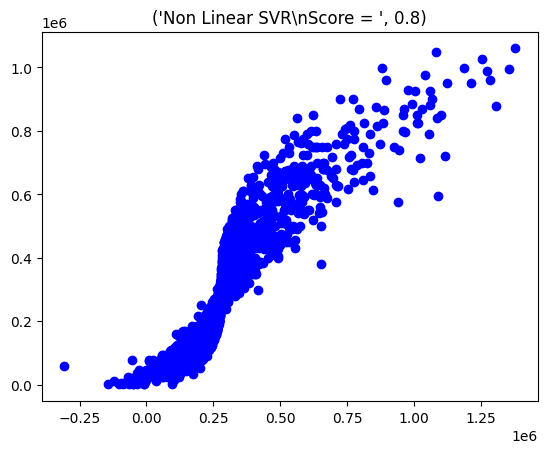

In [ ]:
bestNonLinearSVRScore = round(bestNonLinearSVR.score(xTestS, yTest), 2)
bestNonLinearSVRpredictedPrice = pd.DataFrame(bestNonLinearSVR.predict(xTestS).round(1))
actualPrice = yTest
plt.title(("Non Linear SVR\nScore = ",  bestNonLinearSVRScore))
for i in range(len(bestNonLinearSVRpredictedPrice)):
  plt.scatter(bestNonLinearSVRpredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

In [ ]:
modelScores = [linRegScore, polyLinRegScore, forestRegScore, bestLinearSVRScore, bestNonLinearSVRScore]

sumModelScores = 0
for i in range(len(modelScores)):
  sumModelScores += modelScores[i]

linRegCoeffient = round(linRegScore / sumModelScores, 2)
polyLinRegCoeffient = round(polyLinRegScore / sumModelScores, 2)
forestRegCoeffient = round(forestRegScore / sumModelScores, 2)
bestLinearSVRCoeffient = round(bestLinearSVRScore / sumModelScores, 2)
bestNonLinearSVRCoeffient = round(bestNonLinearSVRScore / sumModelScores, 2)
print("Linear Regression: ", linRegCoeffient)
print("Poly Linear Regression: ", polyLinRegCoeffient)
print("Random Forest Regression: ", forestRegCoeffient)
print("Linear SVR: ", bestLinearSVRCoeffient)
print("Non Linear SVR: ", bestNonLinearSVRCoeffient)

Linear Regression:  0.21
Poly Linear Regression:  0.21
Random Forest Regression:  0.21
Linear SVR:  0.2
Non Linear SVR:  0.17


In [ ]:
finalPredictedPrice = round(((linRegCoeffient * linRegpredictedPrice) + (polyLinRegCoeffient * polyLinRegpredictedPrice) + (forestRegCoeffient * forestRegpredictedPrice) + (bestLinearSVRCoeffient * bestLinearSVRpredictedPrice) + (bestNonLinearSVRCoeffient * bestNonLinearSVRpredictedPrice)), 1)

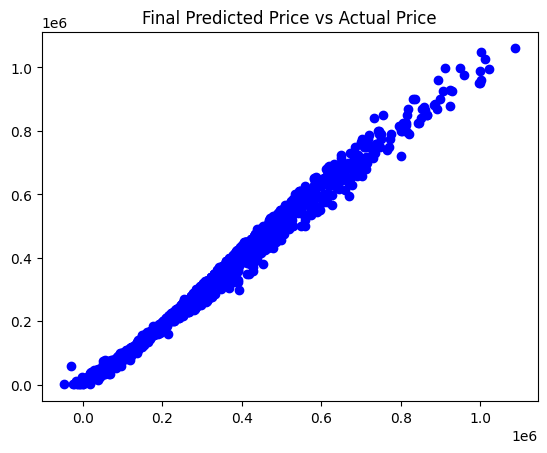

In [ ]:
actualPrice = yTest
plt.title("Final Predicted Price vs Actual Price")
for i in range(len(finalPredictedPrice)):
  plt.scatter(finalPredictedPrice.iloc[i], actualPrice.iloc[i], c="blue", marker="o")

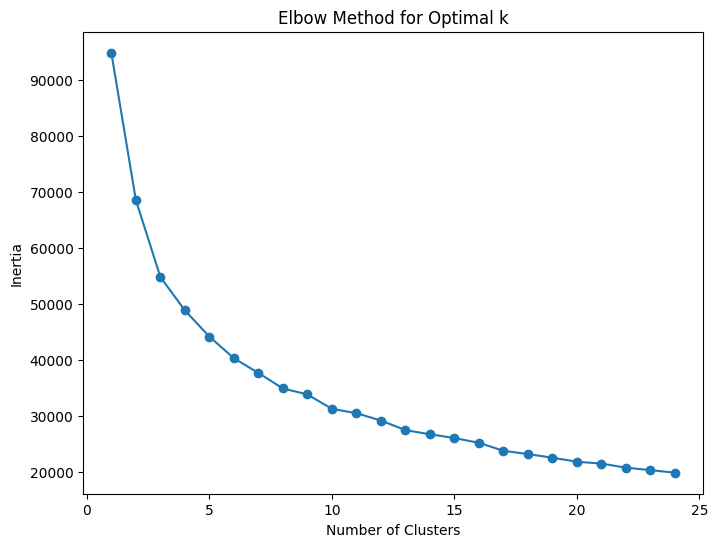

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xTrainS)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(xTrainS)

kMeansLabels = []
for i in range(len(kmeans.labels_)):
  kMeansLabels.append(int(kmeans.labels_[i]))

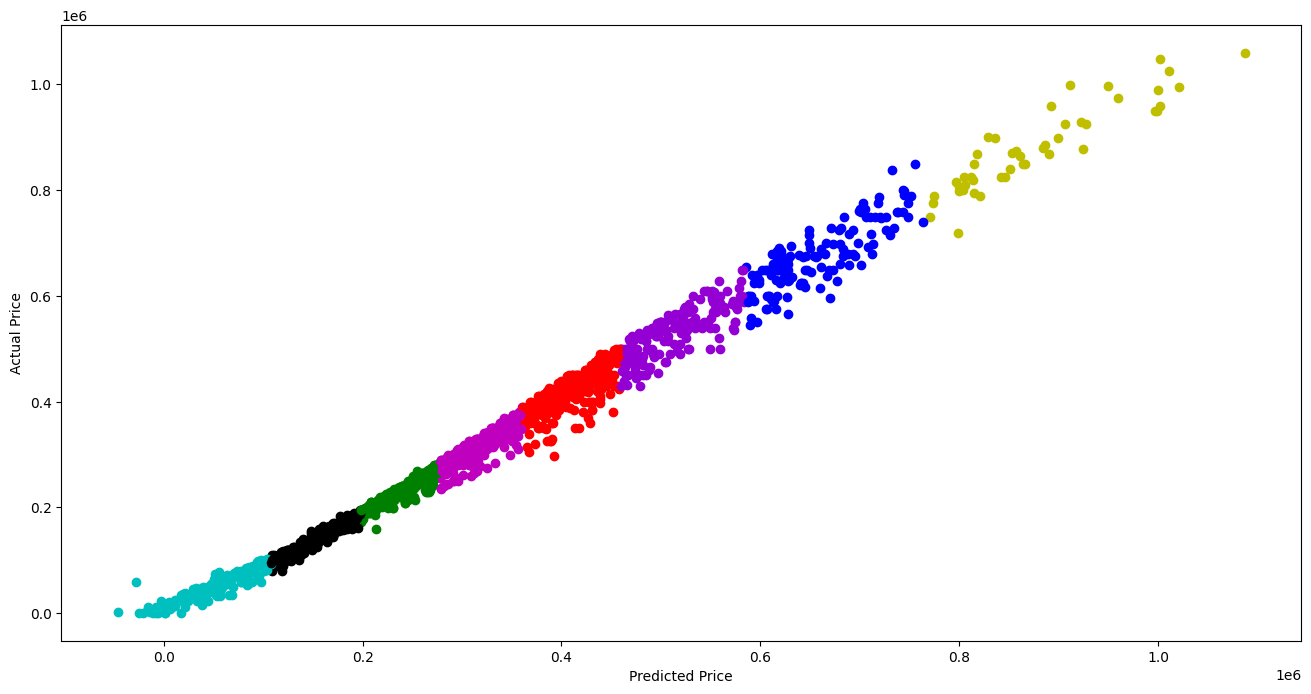

In [ ]:
kmeans.fit(finalPredictedPrice, actualPrice)
numberOfColours = kmeans.n_clusters

plt.figure(figsize=(16, 8))
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price", rotation=90)

colours = ["b", "g", "r", "c", "m", "y", "k", "darkviolet"]

count = 0
for i in range(len(finalPredictedPrice)):
  plt.scatter(finalPredictedPrice.iloc[i], actualPrice.iloc[i], c=colours[kmeans.labels_[i]], marker="o")
  count += 1

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(xTrainS)

kMeansLabels = []
for i in range(len(kmeans.labels_)):
  kMeansLabels.append(int(kmeans.labels_[i]))

In [ ]:
xTrain["Clusters"] = kMeansLabels
xTest["Clusters"] = kmeans.predict(xTestS)

xCLF = xTrain.drop("Clusters", axis = 1)
yCLF = xTrain["Clusters"]
xTestCLF = xTest.drop("Clusters", axis = 1)
yTestCLF = xTest["Clusters"]

In [ ]:
xCLF = standardScaler.fit_transform(xCLF)
xTestCLF = standardScaler.fit_transform(xTestCLF)

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(multi_class="ovr")
logRegFit = logReg.fit(xCLF, yCLF)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

predictedLogReg = logReg.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedLogReg)

0.9295175023651845

In [ ]:
softmaxReg = LogisticRegression(multi_class="multinomial")
softmaxRegFit = softmaxReg.fit(xCLF, yCLF)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
predictedSoftmax = softmaxReg.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedSoftmax)

0.989120151371807

In [ ]:
from sklearn.svm import LinearSVC, SVC

linearSVC = LinearSVC()
linearSVCFit = linearSVC.fit(xCLF, yCLF)

In [ ]:
predictedLinearSVC = linearSVC.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedLinearSVC)

0.9304635761589404

In [ ]:
polyFeatures = PolynomialFeatures()
xTrainPoly = polyFeatures.fit_transform(xCLF)
nonLinearSVC = LinearSVC()
nonLinearSVCFit = nonLinearSVC.fit(xCLF, yCLF)

In [ ]:
predictedNonLinearSVC = nonLinearSVC.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedNonLinearSVC)

0.9304635761589404

In [ ]:
kernelNonLinearSVC = SVC(kernel = "poly")
kernelNonLinearSVCFit = kernelNonLinearSVC.fit(xCLF, yCLF)

In [ ]:
predictedKernelNonLinearSVC = pd.DataFrame(kernelNonLinearSVC.predict(xTestCLF).round(1))
accuracy_score(yTestCLF, predictedKernelNonLinearSVC)

0.9588457899716177

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decTreeCLF = DecisionTreeClassifier()
decTreeCLFFit = decTreeCLF.fit(xCLF, yCLF)

In [ ]:
predictedDecTreeCLF = decTreeCLF.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedDecTreeCLF)

0.9583727530747398

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ranForestCLF = RandomForestClassifier()
ranForestCLFFit = ranForestCLF.fit(xCLF, yCLF)

In [ ]:
predictedRanForestCLF = ranForestCLF.predict(xTestCLF).round(1)
accuracy_score(yTestCLF, predictedRanForestCLF)

0.9749290444654684

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

linearSVCCalib = CalibratedClassifierCV(linearSVC)
nonLinearSVCCalib = CalibratedClassifierCV(nonLinearSVC)
kernelNonLinearSVCCalib = CalibratedClassifierCV(kernelNonLinearSVC)

votingCLF = VotingClassifier(
    estimators=[
        ('log_reg', logReg),
        ('softmax_reg', softmaxReg),
        ('linear_svc', linearSVCCalib),
        ('nonlinear_svc', nonLinearSVCCalib),
        ('kernel_svc', kernelNonLinearSVCCalib),
        ('decision_tree', decTreeCLF),
        ('random_forest', ranForestCLF)
    ]
)

votingCLF.fit(xCLF, yCLF)
votingCLF.score(xTestCLF, yTestCLF)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9626300851466414

In [ ]:
votingCLF.voting = "soft"

votingCLF.fit(xCLF, yCLF)
votingCLF.score(xTestCLF, yTestCLF)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.97918637653737